In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──
✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
#read in model

ATAC_model = readRDS("Trained_models/train_20_predict_80_models/Lasso_models/lasso_normalized_trimmed.rds")

meth_model = readRDS("Trained_models/Methylation_models/train_20_predict_80_models/Lasso_models/lasso_normalized_trimmed.rds")

In [3]:
# get coefficients and the feature names
ATAC_coef <- ATAC_model$beta
ATAC_coef[0:6,]
ATAC_coef_df <- as.data.frame(as.matrix(ATAC_coef))

ATAC_coef_df <- rownames_to_column(ATAC_coef_df, "feature")
colnames(ATAC_coef_df) <- c("feature", "coef_value")
ATAC_coef_df


meth_coef <- meth_model$beta
meth_coef[0:6,]
meth_coef_df <- as.data.frame(as.matrix(meth_coef))

meth_coef_df <- rownames_to_column(meth_coef_df, "feature")
colnames(meth_coef_df) <- c("feature", "coef_value")
head(meth_coef_df)

Loading required package: Matrix

Attaching package: ‘Matrix’

The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



ERROR: Error in (function (classes, fdef, mtable) : unable to find an inherited method for function ‘[’ for signature ‘"dgCMatrix"’


In [4]:
ATAC_coef_df$feature <- sub('.', '', ATAC_coef_df$feature)
ATAC_coef_df$feature <- as.numeric(ATAC_coef_df$feature)
head(ATAC_coef_df)

ERROR: Error in sub(".", "", ATAC_coef_df$feature): object 'ATAC_coef_df' not found


In [23]:
ATAC_coef_df$coef_value <=  0.1

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE FALSE FALSE
[289] FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE
[301] FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
[313]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE

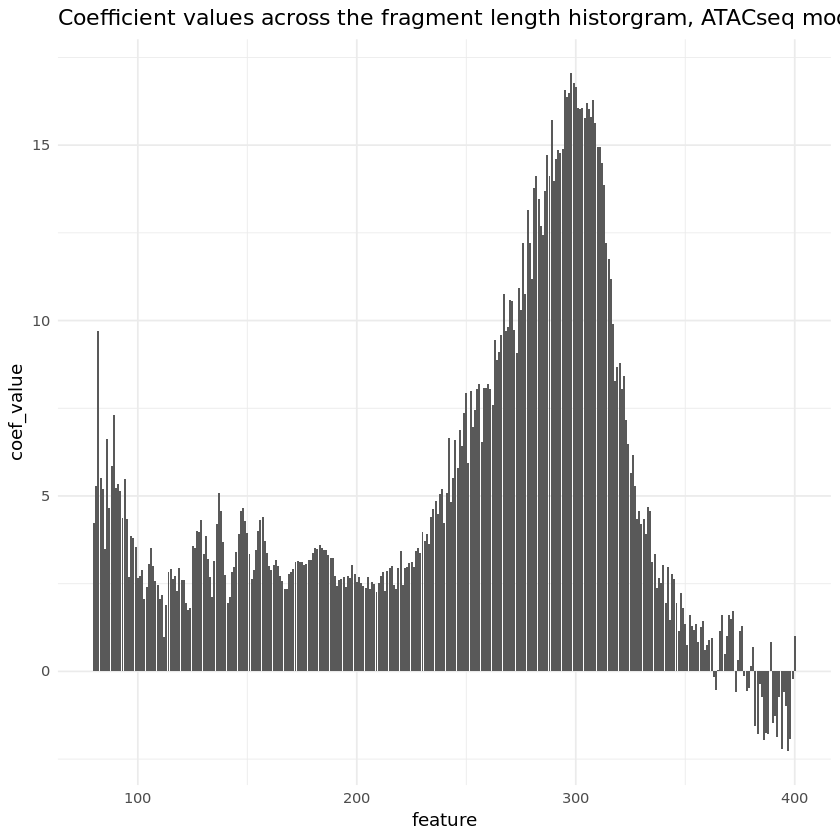

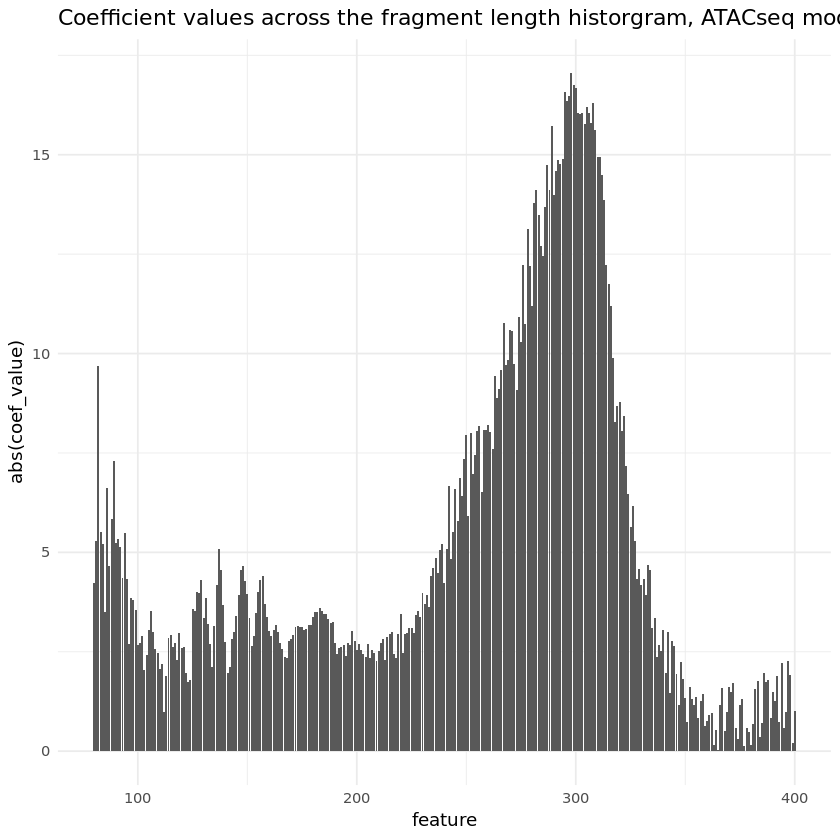

In [24]:
#plot coefficient values across the trimmed fragment length histograms

p <- ggplot(ATAC_coef_df) + geom_col(aes(x = feature, y = coef_value)) + ggtitle("Coefficient values across the fragment length historgram, ATACseq model")  + theme_minimal()
print(p)

p_abs <- ggplot(ATAC_coef_df) + geom_col(aes(x = feature, y = abs(coef_value))) + ggtitle("Coefficient values across the fragment length historgram, ATACseq model")  + theme_minimal()
print(p_abs)

In [25]:
meth_coef_df$feature <- sub('.', '', meth_coef_df$feature)
meth_coef_df$feature <- as.numeric(meth_coef_df$feature)
head(meth_coef_df)

feature,coef_value
80,-166.20268
81,-19.36650
82,246.97909
83,289.93540
84,31.95704
85,116.61636


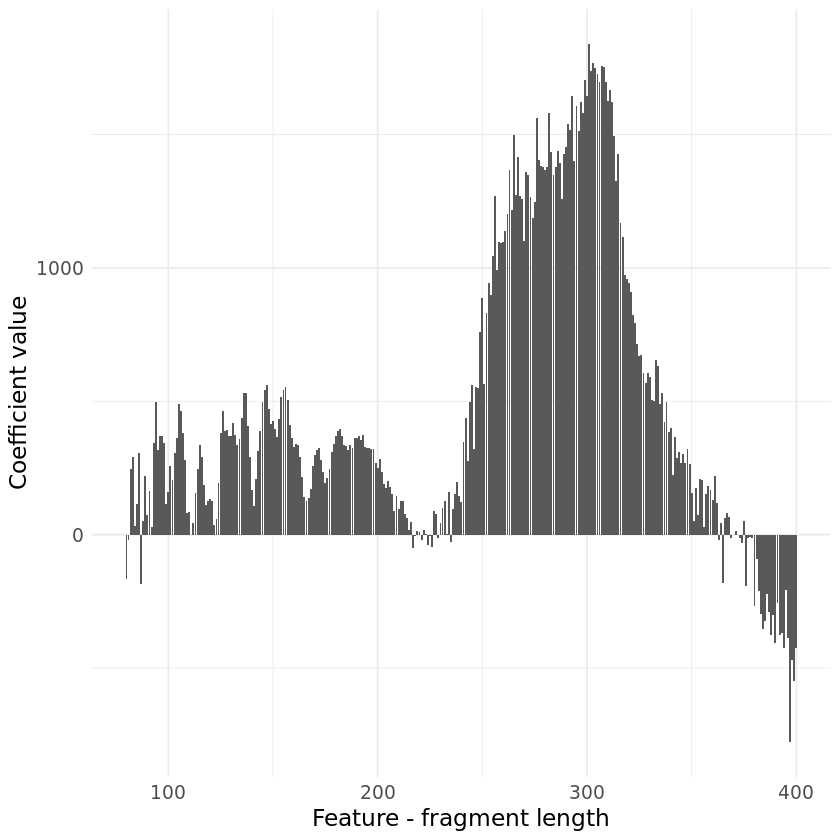

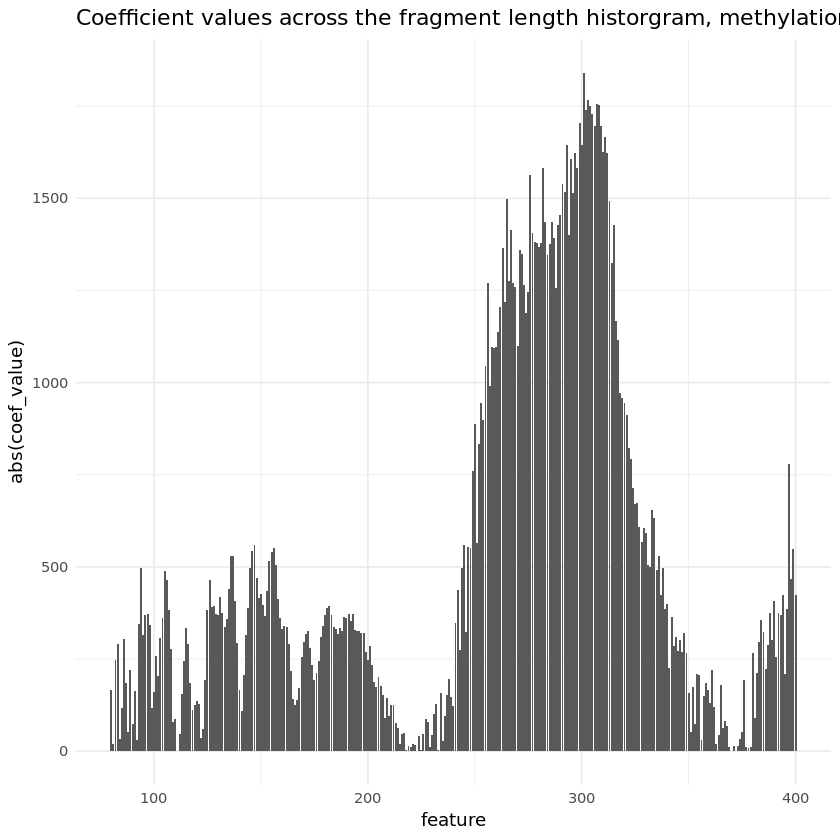

In [27]:
#plot coefficient values across the trimmed fragment length histograms

p_meth <- ggplot(meth_coef_df) + geom_col(aes(x = feature, y = coef_value)) + 
            theme_minimal() + 
            xlab("Feature - fragment length") + 
            ylab("Coefficient value") + 
            theme(text = element_text(size = 14)) 
print(p_meth)
#ggtitle("Coefficient values across the fragment length historgram, methylation model") 

p_meth_abs <- ggplot(meth_coef_df) + geom_col(aes(x = feature, y = abs(coef_value))) + ggtitle("Coefficient values across the fragment length historgram, methylation model")  + theme_minimal()
print(p_meth_abs)

In [29]:
png("Plots_for_the_project_report/methylation_pred_model_coef_histogram.png")
print(p_meth)
dev.off()

png 
  2